In [1]:
!pip install lingtrain_aligner
!pip install razdel
!pip install dateparser
!pip install sentence_transformers
!pip install more_itertools
!pip install hf_xet
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
from IPython.utils import io
import torch
import time
from torch import optim
from torch.nn import functional as F
import shutil
import pickle
import os
import re

with io.capture_output() as captured:
  !pip install transformers sentencepiece sentence_transformers xmltodict pypinyin pykakasi

from sentence_transformers import SentenceTransformer, SentencesDataset, LoggingHandler, losses
from sentence_transformers.readers import InputExample
from sentence_transformers.evaluation import SentenceEvaluator
from torch.utils.data import DataLoader
from datetime import datetime
import math

from transformers import AutoTokenizer, AutoModel, get_linear_schedule_with_warmup
from torch.optim import AdamW
from tqdm.notebook import tqdm

In [3]:
import tensorflow as tf
from lingtrain_aligner import splitter, aligner, resolver, metrics

In [4]:
import pandas as pd

In [5]:
tails = pd.read_excel('Tails.xlsx')

In [6]:
tails

,Name,Kunadinsky,Russian
0,Куу калыктыҥ чӧрчеги / Сказка о лебедином народе,"Качан, качандаа чер сыртында пир ньаан калык ч...",Давным-давно на земле жил один большой народ. ...
1,Куманды калыктыҥ тазылы. Кип-Чӧрчек / Корни ку...,По Кип-Чӧрчекти кӧргенде ирткан тушта чер чайа...,"Согласно легенде, в древние времена духи приро..."
2,Чер-чарык чайалганы / Легенда о создании мира,Ӱӱрде ирткен качандаа кудай учы-тӱби чок талай...,Давным-давно Бог создал бескрайнее море и небо...
3,Апшыйач ла куртыйач / Старик и старушка,"Пир тушта, качандаа чыш черде, айры чагазында,...",Когда-то в лесном краю на берегу реки жили люд...
4,Альчи ла кийик / Альчи и олень,"Тӱндӱк черде, ньаан Умар айрыныҥ чагазында кий...","На севере, на берегу большой реки Обь жил наро..."
5,Аҥчы ла Челбеен / Охотник и Челбеен,"Аба чыштыҥ аразында пуруна, пуруна чатында кар...","Давным-давно в таёжном краю, у подножья чёрной..."
6,Игерниҥ тӧртиги / Собачий хлеб,Качан – качандаа Алтайда ньаан калык чаткан. О...,Когда-то на Алтае жил большой народ. Люди на э...
7,Тöреен черим чÿрегимде / Родная земля в сердце,"Кöк ээниг сында, ээс тагларныҥ кийниндеҥ таҥ ч...","На синей широкой гриве, за высокими горами на ..."


In [7]:
name = tails['Name'].tolist()
kum = tails['Kunadinsky'].tolist()
rus = tails['Russian'].tolist()

In [8]:
print(name)

['Куу калыктыҥ чӧрчеги / Сказка о лебедином народе', 'Куманды калыктыҥ тазылы. Кип-Чӧрчек / Корни кумандинского народа. Легенда', 'Чер-чарык чайалганы / Легенда о создании мира', 'Апшыйач ла куртыйач / Старик и старушка', 'Альчи ла кийик / Альчи и олень', 'Аҥчы ла Челбеен / Охотник и Челбеен', 'Игерниҥ тӧртиги / Собачий хлеб', 'Тöреен черим чÿрегимде / Родная земля в сердце']


In [9]:
name = ['Сказка о лебедином народе', 'Корни кумандинского народа. Легенда', 'Легенда о создании мира', 'Старик и старушка', 'Альчи и олень', 'Охотник и Челбеен', 'Собачий хлеб', 'Родная земля в сердце']

In [10]:
for i in range(len(name)):
  print(len(kum), '\t', len(rus), '\n', kum[i], '\n', rus[i], '\n', '-'*20)

8 	 8 
 Качан, качандаа чер сыртында пир ньаан калык чаткан. Анар пойыны кууныҥ калыгы деп аданар. Алдындаҥ пери анаҥ аназы куу полгон деп анар пӱткенер. Анар чакшы кӧӧнилиг, улузыраш калык полгон. Коштыйа анаҥ ла чатчын калык куу калыкты тоога салган, кӱндӱлен. Ӧзере садыжып, положып ӧштиглердин ӧзере аданыны алыжып чуртарыны абыр тутып чатканар. Че по канчеп таа чыллар, шактар ӧте перерде, куу калык пойыныҥ чайалганыны тыҥ улугзыранып, пактанып, тазаҥнап чӱре пердилер. «- Пис чараш куудаҥ шыккан калык!» - деп, айлантыра чаткан калыкка айтканар. «- По куш тыҥ ээс кӧк тегриде кудайга чагын ӱчип чӱрчит. Пистиҥ калык угала даа тыҥ, аҥ учын парчызы писти кӱндӱлерге керек». Ийде пойыныҥ чайалганыны ӧрӧ кӧдӱрип, аалында чакшы иштенген мелерини кичигден, кичигден уҥдыйа пенер. Коштыйа чатчын калыктарла ӧштеже пердилер, ӧзере сатыштанды токтатсалдылар, ус иштейтен мелерини кеде эдип, чакшы алыптыг чӧрчӧктерини ийтенини уҥдып салдылар. Канчеп тьаа туш ӧте перерде куу калык аразында ӧзере ӧштеш

In [11]:
from lingtrain_aligner import vis_helper
from lingtrain_aligner import saver

In [12]:
class alignment:

  def __init__(self, kum: list, ru: list, db_path: str):
    """
    Инициализация класса alignment.

    Args:
    kum (List[str]): Список сказок на кумандинском
    rus (List[str]): Список сказок на русском
    db_path: str --> задает имя базе данных
    """

    self.kum = kum
    self.ru = ru
    self.name = db_path
    self.db_path = f'{db_path}.db'
    # self.model = model

  def read_text(self): #создает список текстов, разделяя на предложения
    lang_from = 'kum'
    lang_to = 'ru'
    splitted_from = splitter.split_by_sentences(self.kum.split('\n'), lang_from)
    splitted_to = splitter.split_by_sentences(self.ru.split('\n'), lang_to)
    aligner.fill_db(self.db_path, lang_from, lang_to, splitted_from, splitted_to)
    print(f'Предложения kum: {len(splitted_from)}    Предложения ru: {len(splitted_to)}')
    # for i in range(len(splitted_from)):
    #   new_line = '\n'
    #   print(f'en: {splitted_from[i]}{new_line}ru: {splitted_to[i]}')

    return splitted_from, splitted_to


  def process(self, model, batch: int, wind: int): #выравнивает
    """
    model: загруженная модель для выравнивания
    batch: int число батчей (batch_size)
    wind: int окно (window)

    """

    self.batch = batch
    self.wind = wind
    a = aligner.align_db(self.db_path,
                model_name="sentence_transformer_multilingual_labse",
                batch_size=self.batch,
                window=self.wind,
                batch_ids=[],
                save_pic=False,
                embed_batch_size=5,
                normalize_embeddings=True,
                show_progress_bar=True,
                shift=0)
    return a

  def visual(self):#визуализирует, запускается дважды
    vis_helper.visualize_alignment_by_db(self.db_path,
        output_path="alignment_vis.png",
        batch_size=60,
        size=(900,900),
        lang_name_from='kum',
        lang_name_to='ru',
        batch_ids=[],
        plt_show=True,
        show_info=False)

    print("score:", metrics.chain_score(self.db_path))


  def conflicts(self, min_chain: int, max_conflicts: int):# определяет и решает конфликты
    """
    min_chain: int минимальная длина цепочки
    max_conflict: максимальная длина конфдикта
    """

    conflicts_to_solve, rest = resolver.get_all_conflicts(self.db_path, min_chain_length=min_chain, max_conflicts_len=max_conflicts)
    steps = 3
    model_name="sentence_transformer_multilingual_labse"

    for i in range(steps):
        conflicts, rest = resolver.get_all_conflicts(self.db_path,
                            min_chain_length=1+i,
                            max_conflicts_len=10*(i+1),
                            batch_id=-1)

        resolver.resolve_all_conflicts(self.db_path, conflicts, model_name, show_logs=False)

        if len(rest) == 0:
            break


  def to_save(self):#сохраняет

    output_path="/content"

    saver.save_plain_text(self.db_path, os.path.join(output_path, f"corpora_{self.name}_kum.txt"), side="from", batch_ids=[])
    saver.save_plain_text(self.db_path, os.path.join(output_path, f"corpora_{self.name}_ru.txt"), side="to", batch_ids=[])
    saver.save_tmx(self.db_path, os.path.join(output_path, f"corpora_{self.name}.tmx"), 'kum', 'ru')

In [13]:
model = AutoModel.from_pretrained("sentence-transformers/LaBSE")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

Предложения kum: 23    Предложения ru: 22
Aligning without segments.
tasks amount: 3
batch: 0 (0)
Loading LaBSE model from Internet.


modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.02k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/5.22M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.62M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

2_Dense/pytorch_model.bin:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Первая визуализация Сказка о лебедином народе


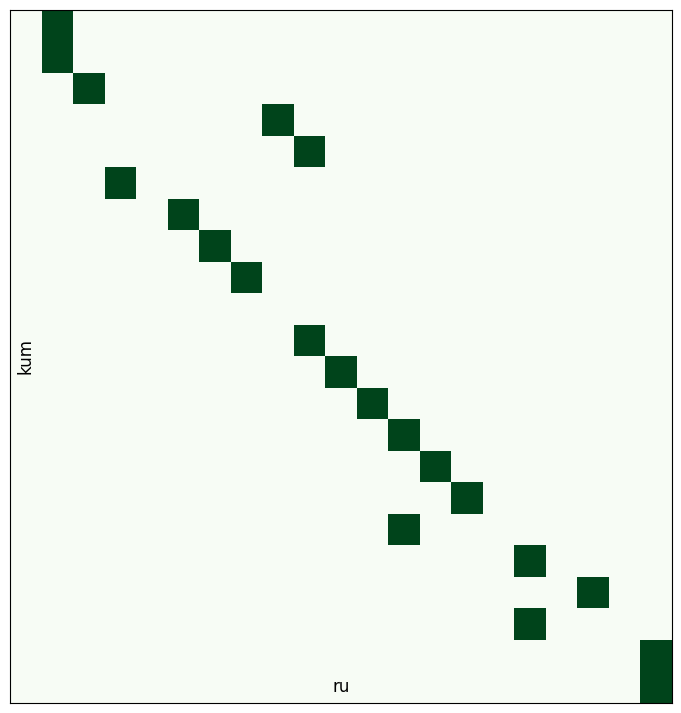

score: 0.4545454545454546
Решение конфликтов Сказка о лебедином народе
conflicts to solve: 2
total conflicts: 3
conflicts to solve: 9
total conflicts: 12


100%|██████████| 9/9 [00:00<00:00, 16.15it/s]


conflicts to solve: 1
total conflicts: 3


100%|██████████| 1/1 [00:00<00:00, 26.95it/s]


conflicts to solve: 0
total conflicts: 2


0it [00:00, ?it/s]


Вторая визуализация Сказка о лебедином народе


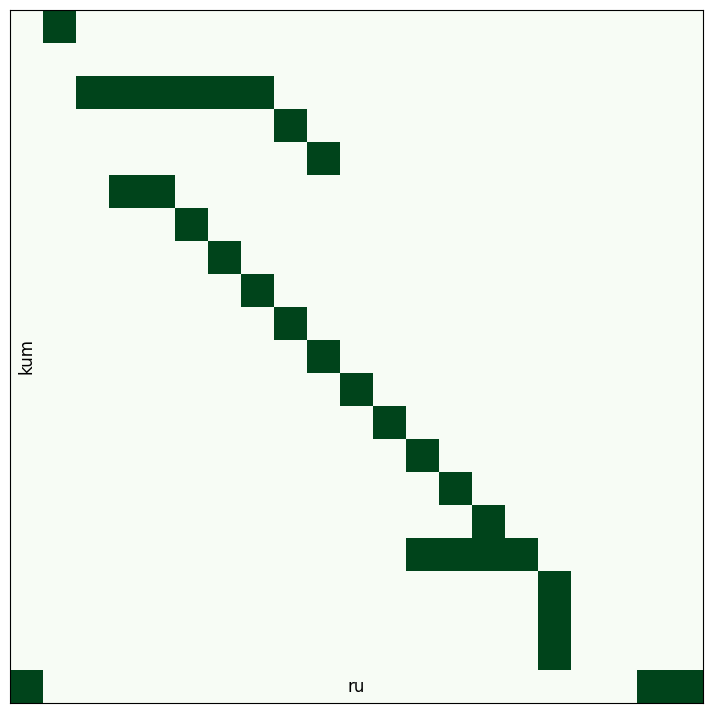

score: 0.9
Сохранение Сказка о лебедином народе
Предложения kum: 25    Предложения ru: 20
Aligning without segments.
tasks amount: 3
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Первая визуализация Корни кумандинского народа. Легенда


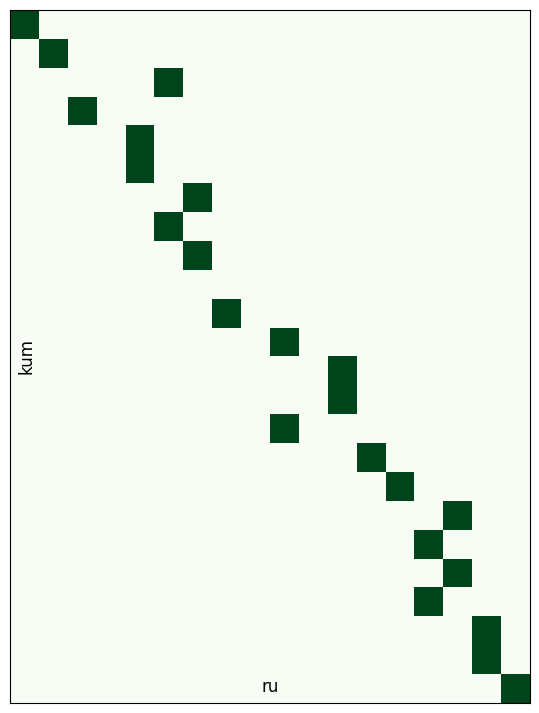

score: 0.33333333333333337
Решение конфликтов Корни кумандинского народа. Легенда
conflicts to solve: 4
total conflicts: 4
conflicts to solve: 11
total conflicts: 16


100%|██████████| 11/11 [00:00<00:00, 26.55it/s]


conflicts to solve: 0
total conflicts: 5


0it [00:00, ?it/s]


conflicts to solve: 0
total conflicts: 4


0it [00:00, ?it/s]


Вторая визуализация Корни кумандинского народа. Легенда


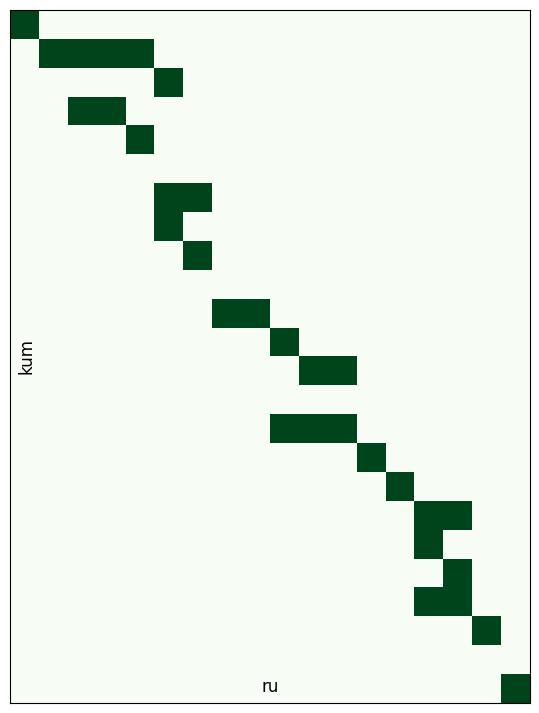

score: 0.84375
Сохранение Корни кумандинского народа. Легенда
Предложения kum: 18    Предложения ru: 18
Aligning without segments.
tasks amount: 2
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Первая визуализация Легенда о создании мира


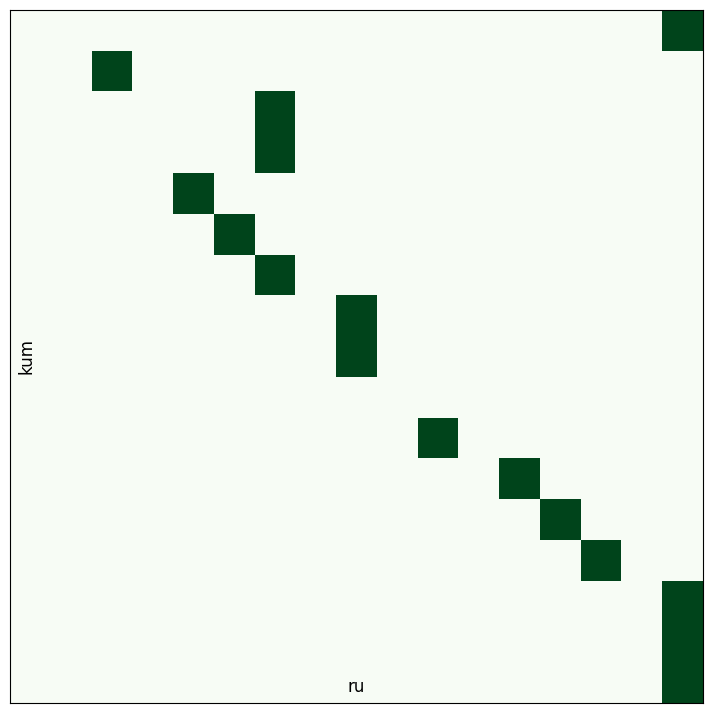

score: 0.2941176470588235
Решение конфликтов Легенда о создании мира
conflicts to solve: 1
total conflicts: 1
conflicts to solve: 11
total conflicts: 12


100%|██████████| 11/11 [00:00<00:00, 25.81it/s]


conflicts to solve: 0
total conflicts: 1


0it [00:00, ?it/s]


conflicts to solve: 0
total conflicts: 1


0it [00:00, ?it/s]


Вторая визуализация Легенда о создании мира


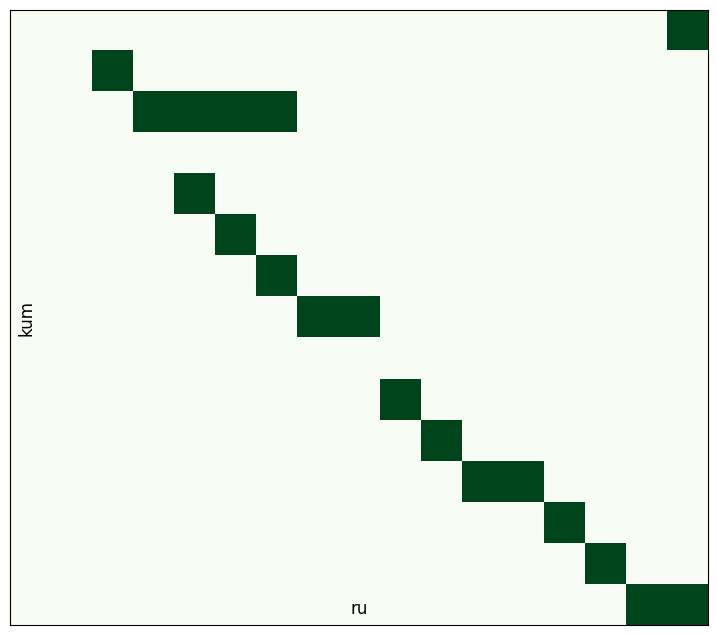

score: 0.8947368421052632
Сохранение Легенда о создании мира
Предложения kum: 20    Предложения ru: 18
Aligning without segments.
tasks amount: 2
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Первая визуализация Старик и старушка


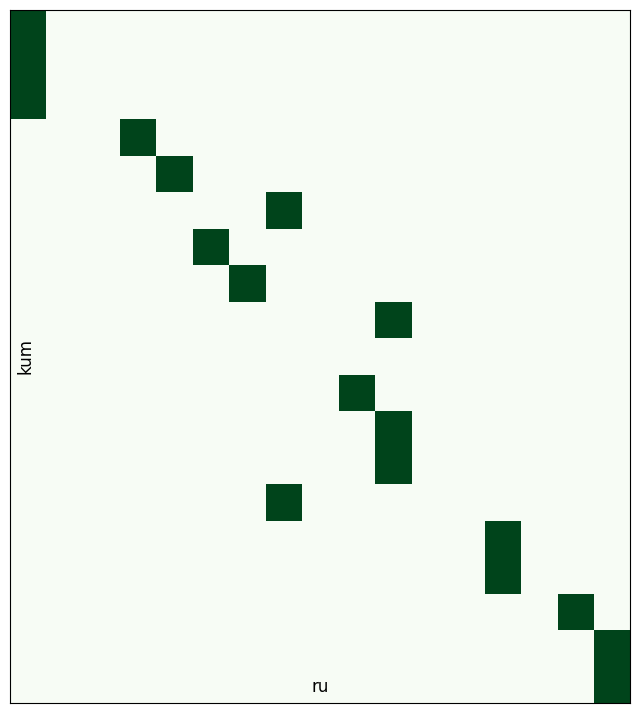

score: 0.3157894736842105
Решение конфликтов Старик и старушка
conflicts to solve: 4
total conflicts: 4
conflicts to solve: 10
total conflicts: 13


100%|██████████| 10/10 [00:00<00:00, 16.67it/s]


conflicts to solve: 2
total conflicts: 5


100%|██████████| 2/2 [00:00<00:00, 20.17it/s]


conflicts to solve: 1
total conflicts: 3


100%|██████████| 1/1 [00:00<00:00, 20.37it/s]


Вторая визуализация Старик и старушка


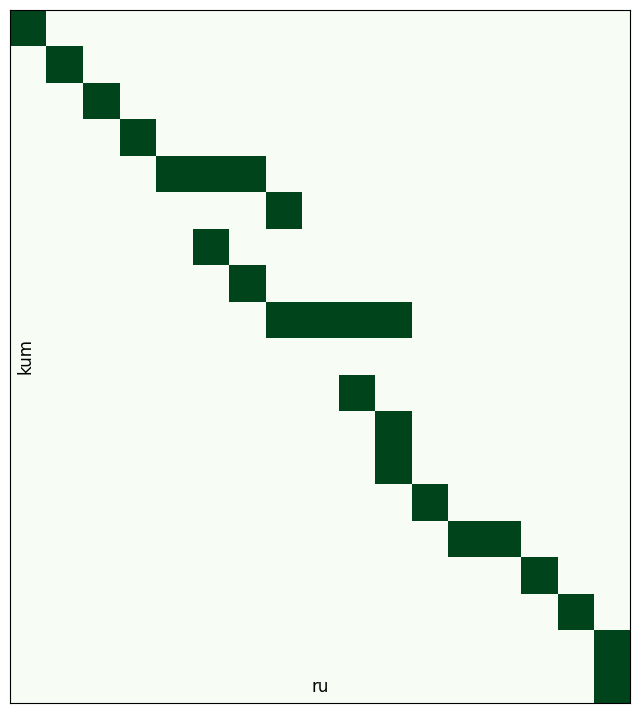

score: 0.9130434782608696
Сохранение Старик и старушка
Предложения kum: 28    Предложения ru: 20
Aligning without segments.
tasks amount: 3
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Первая визуализация Альчи и олень


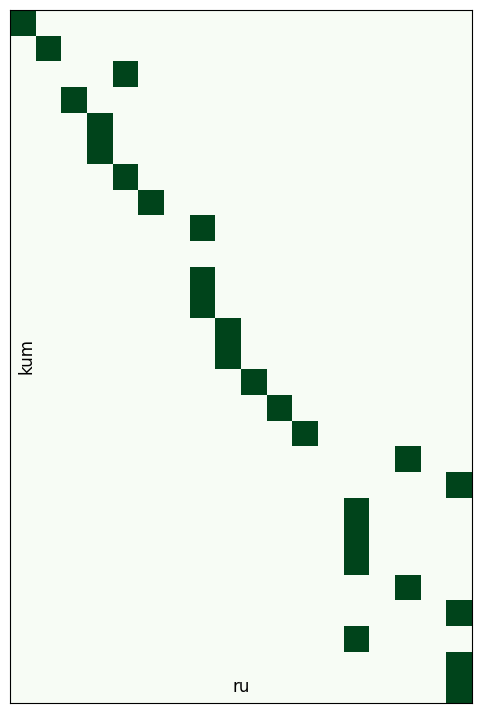

score: 0.37037037037037035
Решение конфликтов Альчи и олень
conflicts to solve: 4
total conflicts: 4
conflicts to solve: 14
total conflicts: 17


100%|██████████| 14/14 [00:00<00:00, 19.68it/s]


conflicts to solve: 0
total conflicts: 3


0it [00:00, ?it/s]


conflicts to solve: 0
total conflicts: 3


0it [00:00, ?it/s]


Вторая визуализация Альчи и олень


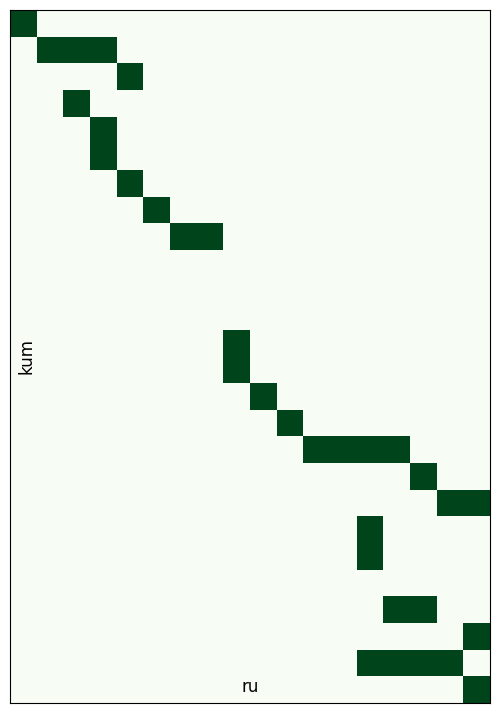

score: 0.8709677419354839
Сохранение Альчи и олень
Предложения kum: 54    Предложения ru: 44
Aligning without segments.
tasks amount: 5
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 3 (3)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 4 (4)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Первая визуализация Охотник и Челбеен


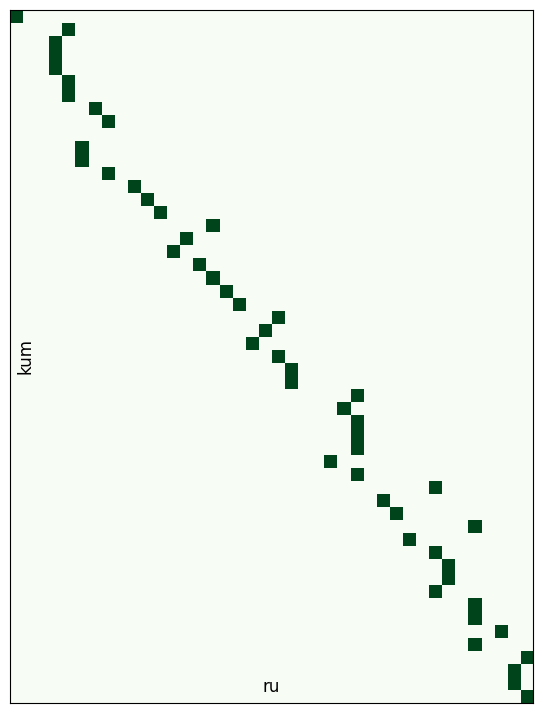

score: 0.26415094339622647
Решение конфликтов Охотник и Челбеен
conflicts to solve: 9
total conflicts: 9
conflicts to solve: 26
total conflicts: 39


100%|██████████| 26/26 [00:01<00:00, 22.05it/s]


conflicts to solve: 3
total conflicts: 13


100%|██████████| 3/3 [00:00<00:00, 25.49it/s]


conflicts to solve: 1
total conflicts: 8


100%|██████████| 1/1 [00:00<00:00, 26.96it/s]


Вторая визуализация Охотник и Челбеен


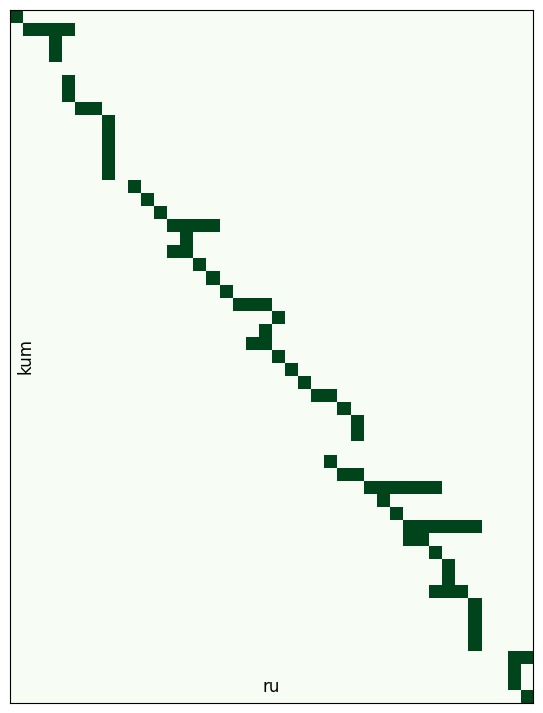

score: 0.8208955223880597
Сохранение Охотник и Челбеен
Предложения kum: 53    Предложения ru: 52
Aligning without segments.
tasks amount: 5
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

batch: 3 (3)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

batch: 4 (4)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Первая визуализация Собачий хлеб


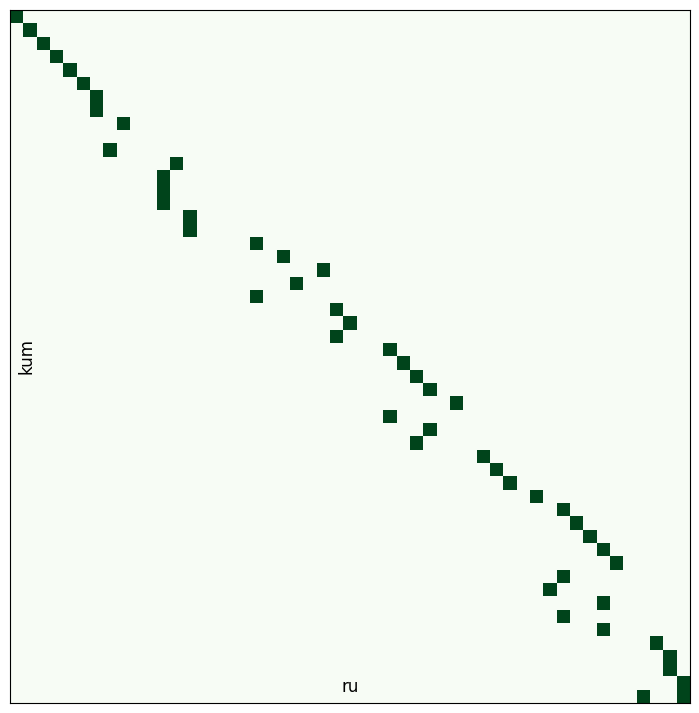

score: 0.3846153846153846
Решение конфликтов Собачий хлеб
conflicts to solve: 5
total conflicts: 6
conflicts to solve: 21
total conflicts: 32


100%|██████████| 21/21 [00:01<00:00, 18.81it/s]


conflicts to solve: 4
total conflicts: 10


100%|██████████| 4/4 [00:00<00:00, 15.27it/s]


conflicts to solve: 3
total conflicts: 7


100%|██████████| 3/3 [00:00<00:00, 12.72it/s]


Вторая визуализация Собачий хлеб


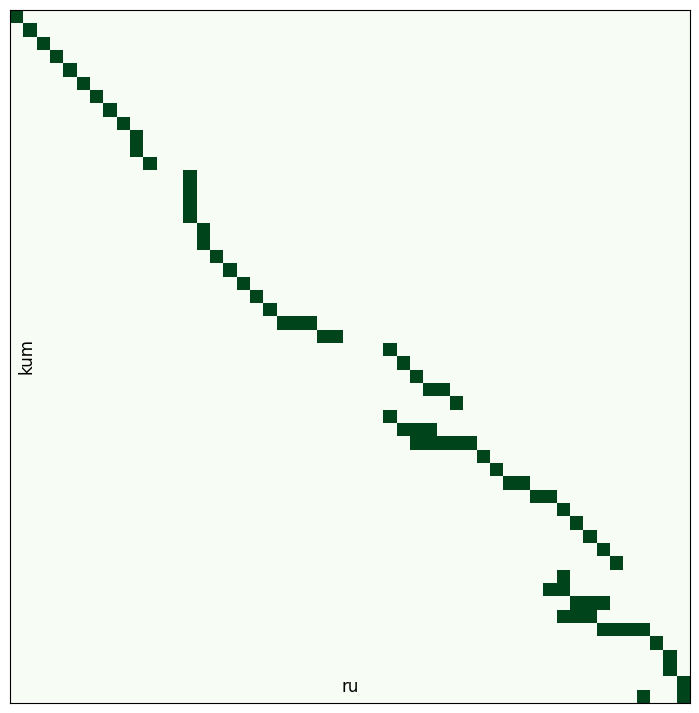

score: 0.8805970149253731
Сохранение Собачий хлеб
Предложения kum: 41    Предложения ru: 37
Aligning without segments.
tasks amount: 4
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

batch: 3 (3)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Первая визуализация Родная земля в сердце


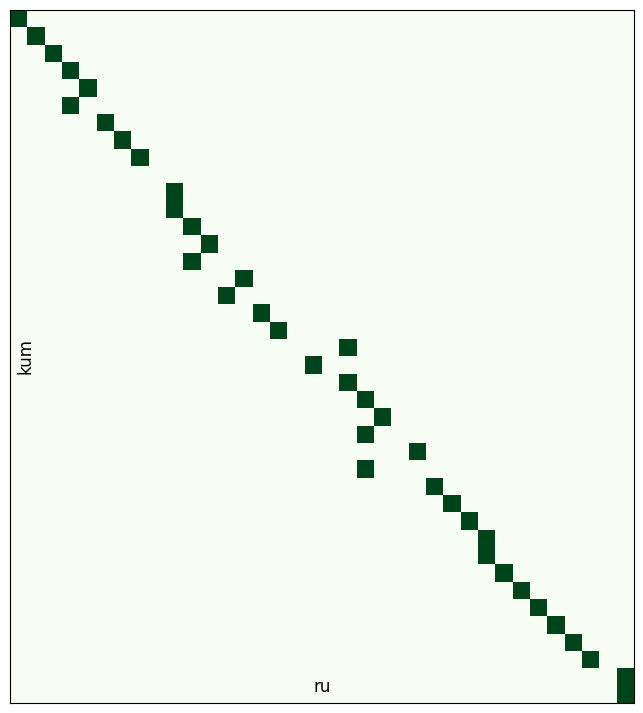

score: 0.55
Решение конфликтов Родная земля в сердце
conflicts to solve: 6
total conflicts: 6
conflicts to solve: 12
total conflicts: 18


100%|██████████| 12/12 [00:00<00:00, 22.45it/s]


conflicts to solve: 0
total conflicts: 6


0it [00:00, ?it/s]


conflicts to solve: 0
total conflicts: 6


0it [00:00, ?it/s]


Вторая визуализация Родная земля в сердце


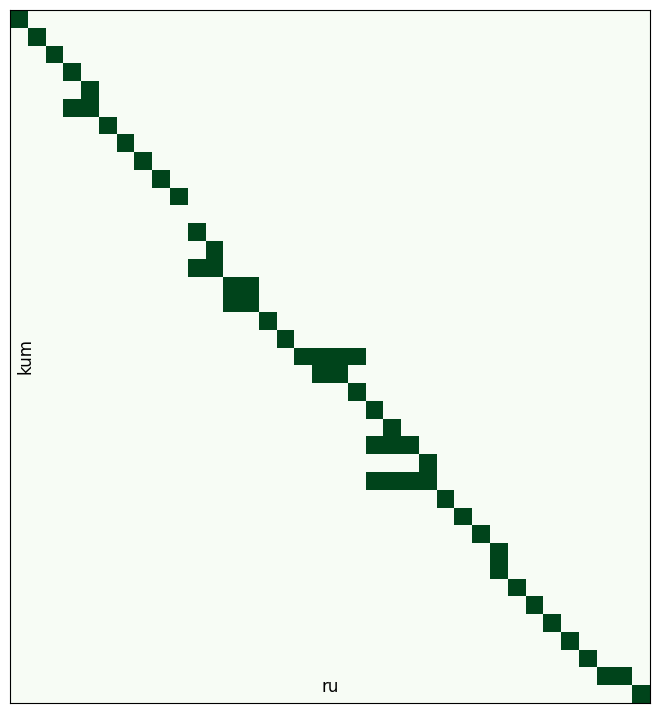

score: 0.8846153846153846
Сохранение Родная земля в сердце


In [14]:
for tail in range(len(name)):
  al = alignment(kum[tail], rus[tail], name[tail])#инилиализация
  splits = al.read_text()
  proc = al.process(model, 11, 3)#выравнивание
  print('Первая визуализация', name[tail])
  viz = al.visual()#визуализация 1
  print('Решение конфликтов', name[tail])
  conf = al.conflicts(2, 10)#подбор параметров и решение конфликтов
  print('Вторая визуализация', name[tail])
  new_viz = al.visual()#визуализация 2 после решения конфликтов
  print('Сохранение', name[tail])
  res = al.to_save()#сохранение в tmx и txt

Предложения kum: 23    Предложения ru: 22
['Качан, качандаа чер сыртында пир ньаан калык чаткан.', 'Анар пойыны кууныҥ калыгы деп аданар.', 'Алдындаҥ пери анаҥ аназы куу полгон деп анар пӱткенер.', 'Анар чакшы кӧӧнилиг, улузыраш калык полгон.', 'Коштыйа анаҥ ла чатчын калык куу калыкты тоога салган, кӱндӱлен.', 'Ӧзере садыжып, положып ӧштиглердин ӧзере аданыны алыжып чуртарыны абыр тутып чатканар.', 'Че по канчеп таа чыллар, шактар ӧте перерде, куу калык пойыныҥ чайалганыны тыҥ улугзыранып, пактанып, тазаҥнап чӱре пердилер.', '«- Пис чараш куудаҥ шыккан калык!» - деп, айлантыра чаткан калыкка айтканар.', '«- По куш тыҥ ээс кӧк тегриде кудайга чагын ӱчип чӱрчит.', 'Пистиҥ калык угала даа тыҥ, аҥ учын парчызы писти кӱндӱлерге керек».', 'Ийде пойыныҥ чайалганыны ӧрӧ кӧдӱрип, аалында чакшы иштенген мелерини кичигден, кичигден уҥдыйа пенер.', 'Коштыйа чатчын калыктарла ӧштеже пердилер, ӧзере сатыштанды токтатсалдылар, ус иштейтен мелерини кеде эдип, чакшы алыптыг чӧрчӧктерини ийтенини уҥдып

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Первая визуализация Родная земля в сердце


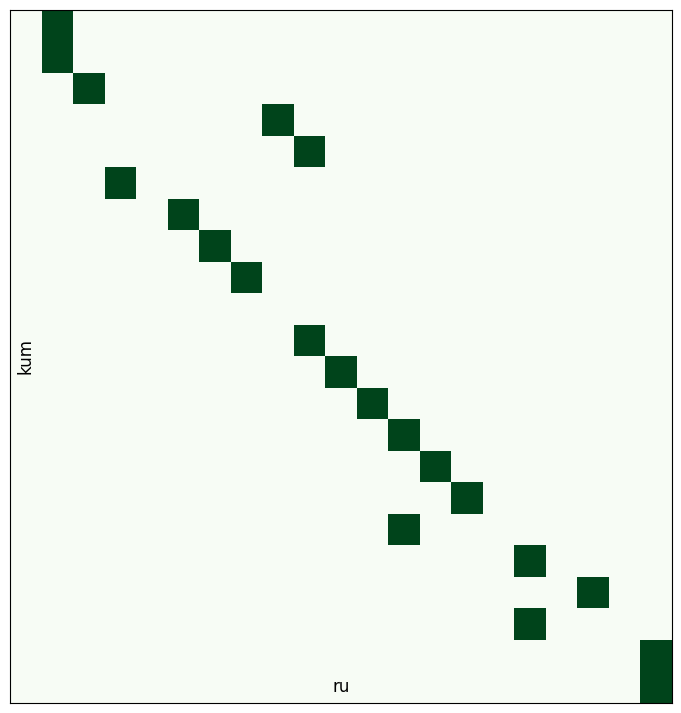

score: 0.4545454545454546


In [ ]:
al = alignment(kum[0], rus[0], f'check_{name[0]}')#инилиализация
splits = al.read_text()
print(splits[0])
proc = al.process(model, 11, 3)#выравнивание
print(f'Первая визуализация', name[0])
viz = al.visual()#визуализация 1
res = al.to_save()#сохранение в tmx и txt

In [ ]:
splits[0]

['Качан, качандаа чер сыртында пир ньаан калык чаткан.',
 'Анар пойыны кууныҥ калыгы деп аданар.',
 'Алдындаҥ пери анаҥ аназы куу полгон деп анар пӱткенер.',
 'Анар чакшы кӧӧнилиг, улузыраш калык полгон.',
 'Коштыйа анаҥ ла чатчын калык куу калыкты тоога салган, кӱндӱлен.',
 'Ӧзере садыжып, положып ӧштиглердин ӧзере аданыны алыжып чуртарыны абыр тутып чатканар.',
 'Че по канчеп таа чыллар, шактар ӧте перерде, куу калык пойыныҥ чайалганыны тыҥ улугзыранып, пактанып, тазаҥнап чӱре пердилер.',
 '«- Пис чараш куудаҥ шыккан калык!» - деп, айлантыра чаткан калыкка айтканар.',
 '«- По куш тыҥ ээс кӧк тегриде кудайга чагын ӱчип чӱрчит.',
 'Пистиҥ калык угала даа тыҥ, аҥ учын парчызы писти кӱндӱлерге керек».',
 'Ийде пойыныҥ чайалганыны ӧрӧ кӧдӱрип, аалында чакшы иштенген мелерини кичигден, кичигден уҥдыйа пенер.',
 'Коштыйа чатчын калыктарла ӧштеже пердилер, ӧзере сатыштанды токтатсалдылар, ус иштейтен мелерини кеде эдип, чакшы алыптыг чӧрчӧктерини ийтенини уҥдып салдылар.',
 'Канчеп тьаа туш 

In [ ]:
splits[1]

['Давным-давно на земле жил один большой народ.',
 'Они называли себя лебединым народом.',
 'Они верили, что их праматерью была лебедь.',
 'Они были гордыми, с хорошими нравами.',
 'Живущий рядом народ считался с ними, они уважали друг друга, вели торговлю, защищались вместе от врагов и жили спокойно.',
 'Но со временем лебединый народ возгордился своим происхождением.',
 '«Мы произошли от прекрасного лебедя!» – говорили рядом живущему народу.',
 '«Эта птица летает в небе, близко к богу.',
 'Наш народ мощный, все должны нас почитать!»',
 'И так возвышая своё происхождение, постепенно, изо дня в день стали забывать свои ремёсла.',
 'Также стали враждовать с соседями, прекратилась торговля, мастерски сделанные вещи забросили, стали забывать свои сказки о богатырях.',
 'Через какое-то время среди лебединого народа стали слышны только крики, вражда.',
 'Однажды их громкие крики, ругань дошли до Бога.',
 'И Бог сказал: «Эти люди не ровня лебединому народу.',
 'Большинство их как осенние жур

In [ ]:
for tail in range(len(name)):
  al = alignment(kum[tail], rus[tail], name[tail])#инилиализация
  splits = al.read_text()

In [ ]:
al = alignment(kum[0], rus[0], 'Сказка о лебедином народе')#инилиализация
splits = al.read_text()

In [ ]:
model = AutoModel.from_pretrained("sentence-transformers/LaBSE")

In [ ]:
proc = al.process(model, 11, 3)#выравнивание
viz = al.visual()#визуализация 1
conf = al.conflicts(2, 10)#подбор параметров и решение конфликтов
new_viz = al.visual()#визуализация 2 после решения конфликтов
res = al.to_save()#сохранение в tmx и txt

In [ ]:

kum[0]

'Качан, качандаа чер сыртында пир ньаан калык чаткан. Анар пойыны кууныҥ калыгы деп аданар. Алдындаҥ пери анаҥ аназы куу полгон деп анар пӱткенер. Анар чакшы кӧӧнилиг, улузыраш калык полгон. Коштыйа анаҥ ла чатчын калык куу калыкты тоога салган, кӱндӱлен. Ӧзере садыжып, положып ӧштиглердин ӧзере аданыны алыжып чуртарыны абыр тутып чатканар. Че по канчеп таа чыллар, шактар ӧте перерде, куу калык пойыныҥ чайалганыны тыҥ улугзыранып, пактанып, тазаҥнап чӱре пердилер. «- Пис чараш куудаҥ шыккан калык!» - деп, айлантыра чаткан калыкка айтканар. «- По куш тыҥ ээс кӧк тегриде кудайга чагын ӱчип чӱрчит. Пистиҥ калык угала даа тыҥ, аҥ учын парчызы писти кӱндӱлерге керек». Ийде пойыныҥ чайалганыны ӧрӧ кӧдӱрип, аалында чакшы иштенген мелерини кичигден, кичигден уҥдыйа пенер. Коштыйа чатчын калыктарла ӧштеже пердилер, ӧзере сатыштанды токтатсалдылар, ус иштейтен мелерини кеде эдип, чакшы алыптыг чӧрчӧктерини ийтенини уҥдып салдылар. Канчеп тьаа туш ӧте перерде куу калык аразында ӧзере ӧштеш, кыйгы

In [ ]:
al = alignment(kum[0], rus[0], 'Сказка о лебедином народе')

In [ ]:
test = al.read_text()

Предложения kum: 23    Предложения ru: 22


In [ ]:
test[1]

['Давным-давно на земле жил один большой народ.',
 'Они называли себя лебединым народом.',
 'Они верили, что их праматерью была лебедь.',
 'Они были гордыми, с хорошими нравами.',
 'Живущий рядом народ считался с ними, они уважали друг друга, вели торговлю, защищались вместе от врагов и жили спокойно.',
 'Но со временем лебединый народ возгордился своим происхождением.',
 '«Мы произошли от прекрасного лебедя!» – говорили рядом живущему народу.',
 '«Эта птица летает в небе, близко к богу.',
 'Наш народ мощный, все должны нас почитать!»',
 'И так возвышая своё происхождение, постепенно, изо дня в день стали забывать свои ремёсла.',
 'Также стали враждовать с соседями, прекратилась торговля, мастерски сделанные вещи забросили, стали забывать свои сказки о богатырях.',
 'Через какое-то время среди лебединого народа стали слышны только крики, вражда.',
 'Однажды их громкие крики, ругань дошли до Бога.',
 'И Бог сказал: «Эти люди не ровня лебединому народу.',
 'Большинство их как осенние жур

In [ ]:
model = AutoModel.from_pretrained("sentence-transformers/LaBSE")

In [ ]:
proc = al.process(model, 11, 3)

Aligning without segments.
tasks amount: 3
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

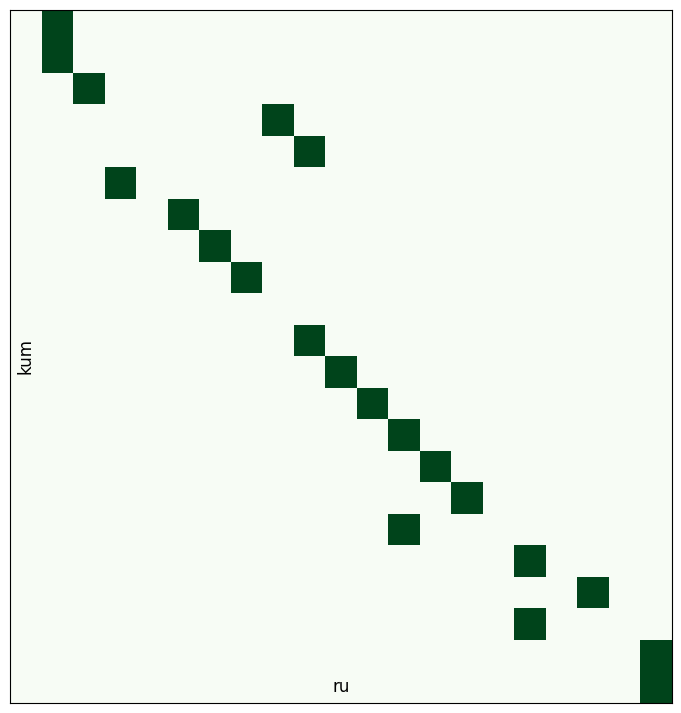

score: 0.4545454545454546


In [ ]:
viz = al.visual()

In [ ]:
conf = al.conflicts(2, 10)

conflicts to solve: 2
total conflicts: 3
conflicts to solve: 9
total conflicts: 12


100%|██████████| 9/9 [00:00<00:00, 17.02it/s]


conflicts to solve: 1
total conflicts: 3


100%|██████████| 1/1 [00:00<00:00, 28.67it/s]


conflicts to solve: 0
total conflicts: 2


0it [00:00, ?it/s]


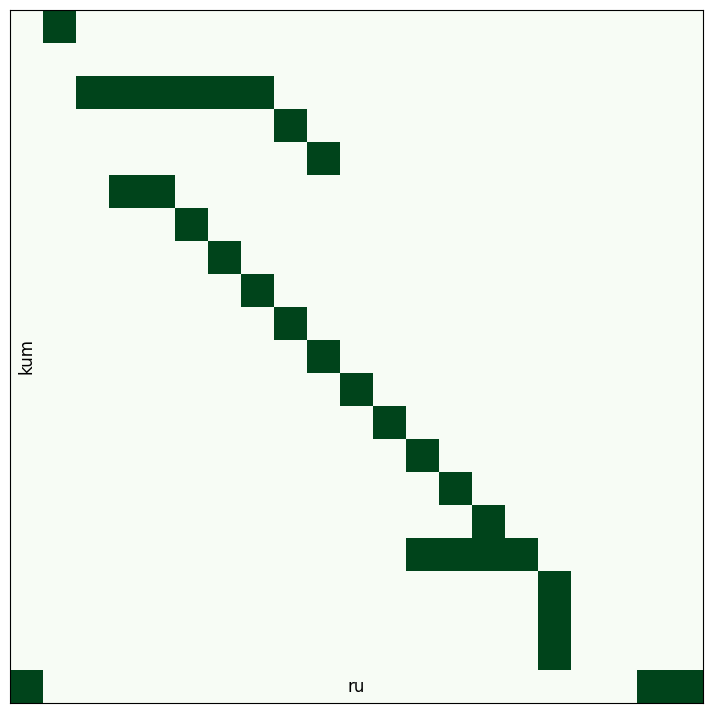

score: 0.9


In [ ]:
new_viz = al.visual()

In [ ]:
from lingtrain_aligner import saver

In [ ]:
res = al.to_save()

In [ ]:
dog_ru_path = 'Dog_ru.txt'
dog_kum_path = 'Dog_kum.txt'

with open(dog_ru_path, 'r', encoding='utf-8') as f:
    dog_ru = f.read()
    print(dog_ru)

with open(dog_kum_path, 'r', encoding='utf-8') as f:
    dog_kum = f.read()
    print(dog_kum)

In [ ]:
lang_from = 'kum'
lang_to = 'ru'
db_path = "test.db"

splitted_from = splitter.split_by_sentences(kum[0].split('\n'), lang_from)
splitted_to = splitter.split_by_sentences(rus[0].split('\n'), lang_to)
aligner.fill_db(db_path, lang_from, lang_to, splitted_from, splitted_to)

In [ ]:
splitted_from

['Качан, качандаа чер сыртында пир ньаан калык чаткан.',
 'Анар пойыны кууныҥ калыгы деп аданар.',
 'Алдындаҥ пери анаҥ аназы куу полгон деп анар пӱткенер.',
 'Анар чакшы кӧӧнилиг, улузыраш калык полгон.',
 'Коштыйа анаҥ ла чатчын калык куу калыкты тоога салган, кӱндӱлен.',
 'Ӧзере садыжып, положып ӧштиглердин ӧзере аданыны алыжып чуртарыны абыр тутып чатканар.',
 'Че по канчеп таа чыллар, шактар ӧте перерде, куу калык пойыныҥ чайалганыны тыҥ улугзыранып, пактанып, тазаҥнап чӱре пердилер.',
 '«- Пис чараш куудаҥ шыккан калык!» - деп, айлантыра чаткан калыкка айтканар.',
 '«- По куш тыҥ ээс кӧк тегриде кудайга чагын ӱчип чӱрчит.',
 'Пистиҥ калык угала даа тыҥ, аҥ учын парчызы писти кӱндӱлерге керек».',
 'Ийде пойыныҥ чайалганыны ӧрӧ кӧдӱрип, аалында чакшы иштенген мелерини кичигден, кичигден уҥдыйа пенер.',
 'Коштыйа чатчын калыктарла ӧштеже пердилер, ӧзере сатыштанды токтатсалдылар, ус иштейтен мелерини кеде эдип, чакшы алыптыг чӧрчӧктерини ийтенини уҥдып салдылар.',
 'Канчеп тьаа туш 

In [ ]:
print(f'Предложения kum: {len(splitted_from)}    Предложения ru: {len(splitted_to)}')

Предложения kum: 23    Предложения ru: 22


In [ ]:
for i in range(len(splitted_from)):
  new_line = '\n'
  print(f'kum: {splitted_from[i]}{new_line}ru: {splitted_to[i]}')

kum: Качан, качандаа чер сыртында пир ньаан калык чаткан.
ru: Давным-давно на земле жил один большой народ.
kum: Анар пойыны кууныҥ калыгы деп аданар.
ru: Они называли себя лебединым народом.
kum: Алдындаҥ пери анаҥ аназы куу полгон деп анар пӱткенер.
ru: Они верили, что их праматерью была лебедь.
kum: Анар чакшы кӧӧнилиг, улузыраш калык полгон.
ru: Они были гордыми, с хорошими нравами.
kum: Коштыйа анаҥ ла чатчын калык куу калыкты тоога салган, кӱндӱлен.
ru: Живущий рядом народ считался с ними, они уважали друг друга, вели торговлю, защищались вместе от врагов и жили спокойно.
kum: Ӧзере садыжып, положып ӧштиглердин ӧзере аданыны алыжып чуртарыны абыр тутып чатканар.
ru: Но со временем лебединый народ возгордился своим происхождением.
kum: Че по канчеп таа чыллар, шактар ӧте перерде, куу калык пойыныҥ чайалганыны тыҥ улугзыранып, пактанып, тазаҥнап чӱре пердилер.
ru: «Мы произошли от прекрасного лебедя!» – говорили рядом живущему народу.
kum: «- Пис чараш куудаҥ шыккан калык!» - деп, 

IndexError: list index out of range

In [ ]:
aligner.align_db(db_path,
                model_name="sentence_transformer_multilingual_labse",
                batch_size=11,
                window=3,
                batch_ids=[],
                save_pic=False,
                embed_batch_size=5,
                normalize_embeddings=True,
                show_progress_bar=True,
                shift=0)

Aligning without segments.
tasks amount: 3
batch: 0 (0)


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 1 (1)


Batches:   0%|          | 0/3 [00:00<?, ?it/s]

Batches:   0%|          | 0/3 [00:00<?, ?it/s]

batch: 2 (2)


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]